### Read in MAG tree

In [12]:
data_folder <- "./example_data"
nwk_file <- "MAG_tree.nwk"
bin_metadata_file <- "MAG_metadata.tsv"
path2nwk_file <- paste(data_folder, nwk_file, sep = "/")
path2metadata_file <- paste(data_folder, bin_metadata_file, sep = "/")
path2nwk_file
path2metadata_file

[1] "../example_data/MAG_tree.nwk"

[1] "../example_data/MAG_metadata.tsv"

### load packages

In [13]:
library("RColorBrewer")
library('ggplot2')
library('ggtree')

### read in tree

In [14]:
tree <- read.tree(path2nwk_file) 
str(tree)

List of 5
 $ edge       : int [1:200, 1:2] 102 103 103 104 104 102 105 106 107 108 ...
 $ edge.length: num [1:200] 0.971 0.243 0.139 0.588 0.275 ...
 $ Nnode      : int 100
 $ node.label : chr [1:100] "OROOT" "" "" "" ...
 $ tip.label  : chr [1:101] "MAG_94" "MAG_64" "MAG_43" "MAG_16" ...
 - attr(*, "class")= chr "phylo"
 - attr(*, "order")= chr "cladewise"


### read in metadata

In [15]:
metadata_df <- read.table(path2metadata_file, header = TRUE, sep = "\t", as.is = TRUE, stringsAsFactors = FALSE)
head(metadata_df)

MAG_ID,Length,Completion,Redundancy,GC_Content
<chr>,<int>,<dbl>,<dbl>,<dbl>
MAG_1,2495192,90.65,6.5,38.80
MAG_10,722913,56.12,0.0,49.36
MAG_100,705754,60.43,4.3,29.17
MAG_101,2446458,97.12,0.7,44.02
MAG_102,2626036,95.68,4.3,46.83
MAG_11,1024210,79.14,2.9,36.51


### associate metadata and tree

In [16]:
p <- ggtree(tree) + theme_tree2() 
p <- p %<+% metadata_df + geom_tiplab(size=1, offset=0.5, align=TRUE, linesize=.2, hjust=-0.1) +
                 geom_tippoint(aes(size=Length), alpha=0.5)
data_df <- data.frame(id=tree$tip.label, data=metadata_df[metadata_df$MAG_ID%in%tree$tip.label, c('Length', 'Completion', 'Redundancy', 'GC_Content')])
head(data_df)

Warning message:
“Duplicated aesthetics after name standardisation: size”

id,data.Length,data.Completion,data.Redundancy,data.GC_Content
<fct>,<int>,<dbl>,<dbl>,<dbl>
MAG_94,2495192,90.65,6.5,38.80
MAG_64,722913,56.12,0.0,49.36
MAG_43,705754,60.43,4.3,29.17
MAG_16,2446458,97.12,0.7,44.02
MAG_32,2626036,95.68,4.3,46.83
MAG_70,1024210,79.14,2.9,36.51


### plot

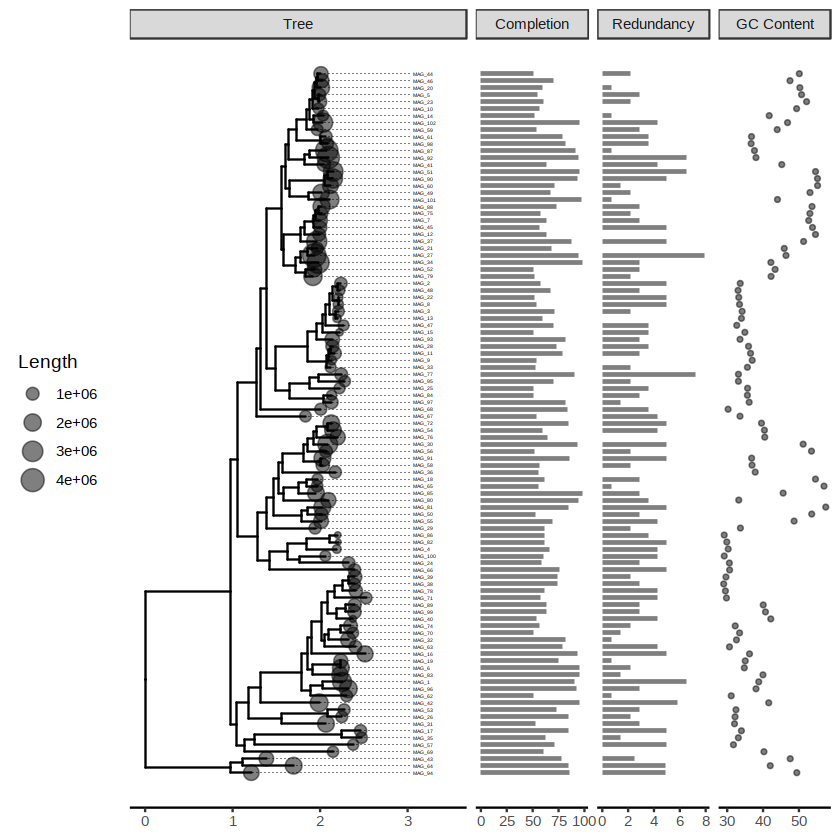

In [17]:
p <- facet_plot(p + xlim_tree(3.5), panel="Completion", data=data_df, geom=geom_segment, aes(x=0, xend=Completion, y=y, yend=y), size=1, alpha=.5)
p <- facet_plot(p, panel="Redundancy", data=data_df, geom=geom_segment, aes(x=0, xend=Redundancy, y=y, yend=y), size=1, alpha=.5)
p <- facet_plot(p, panel="GC Content", data=data_df, geom=geom_point, aes(x=GC_Content), alpha=.5, size=1)
p <- p + theme(legend.position = 'left') + scale_colour_gradient(low = "blue", high = "red") #scale_color_gradient2(midpoint = mid, low = "blue", mid = "white", high = "red", space = "Lab" )# 
library(grid)
gt = ggplot_gtable(ggplot_build(p))
gt$widths[7] = 3*gt$widths[7]  # increase the width of Tree panel
grid.draw(gt)

# save the plot
ggsave(filename="MAGstats.pdf", plot = last_plot(), path="./", 
       scale = 1, width = 297, height = 210, units = "mm",
       dpi = 300, limitsize = FALSE)